# **Homework Five**


•	(Ungraded, but as always, completion still counts!) DataCamp Data Ingestion & inspection, and Exploratory data analysis

•	(Ungraded) Reading Vanderplas Chapters 2 & 3 (https://jakevdp.github.io/PythonDataScienceHandbook/)

•	(Graded) Part I: Gaddis 11.3 (Follow prompts below), Part II: Data exercise below (Enter your code whereever it says # Your code here)

# ** Part I (Gaddis 11.3)**

Below is a class named <span style="color:green"> Person </span> with data attributes for a person’s ** name, address, and telephone number**. Next, write a class named <span style="color:green"> Customer </span> that is a subclass of the Person class. The <span style="color:green"> Customer </span> class should have a data attribute for a **customer number**, and a Boolean data attribute, **on_list**, indicating whether the customer wishes to be on a mailing list. The <span style="color:green"> Customer </span> class should also have a method that asks the user if they want to be on the list (y/n), and then assigns that to the on_list attribute. Demonstrate an instance of the <span style="color:green"> Customer </span> class in a simple program. (This is a short problem, so don't overthink it.)


In [1]:
class Person:
    def __init__(self, name, address, phone_number):
        self.name = name
        self.address = address
        self.phone_number = phone_number

In [2]:
class Customer(Person):
    def __init__(self, name, address, phone_number, cust_number, on_list):
        Person.__init__(self, name, address, phone_number)
        self.cust_number = cust_number
        self.on_list = on_list

    def set_on_list(self):
        self.on_list = input("Say y/n if you want to be on the list: ")

1. Create an instance of the Customer class called Jane, instantiating Jane with 'n' for the on-list attribute. 
2. Then call the set_on_list() method for Jane, and respond 'y'
3. Call the Jane.on_list attribute to show that on_list changed from 'n' to 'y'

In [3]:
# Your code here after Jane
Jane = Customer("Jane", "1234 Drive", 1234567890, 12345, "n")

Jane.set_on_list()

Jane.on_list

Say y/n if you want to be on the list: y


'y'

# Part II (Data)

a) Use the bmore.csv dataset for this homework. Make sure your output does not display errors. 
Import the data into a DataFrame and describe the data.

In [7]:
import time                     
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

from patsy import dmatrices

df = pd.read_csv('bmore.csv')
df.describe()


,Population,Median_Income,Unemployed,Families_in_Poverty,Bachelors_degree,Juvenile_Arrest_Rate,Homicide_Incidence_Rate,Unnamed: 8
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,11214.581818,40319.454545,0.116727,0.158364,0.258727,162.874545,21.463636,71.498182
std,4340.770727,16405.020242,0.055044,0.102158,0.208060,132.828931,15.525777,4.782897
min,4097.000000,13388.000000,0.030000,0.000000,0.040000,17.800000,0.000000,62.900000
25%,7840.500000,30228.500000,0.075000,0.090000,0.085000,79.100000,9.300000,68.150000
50%,9874.000000,36632.000000,0.110000,0.130000,0.180000,129.400000,19.000000,71.900000
75%,14675.000000,47744.500000,0.150000,0.210000,0.370000,210.550000,29.500000,74.300000
max,23557.000000,90492.000000,0.280000,0.490000,0.750000,906.700000,61.800000,83.100000


b) Report summary statistics (e.g., mean, median, and standard deviations) of all numerical
variables using numpy's methods. That is, print a table that says something like this:

** variable 1 name **

mean(Variable 1)

median(variable 1)

stand.Dev.(Variable 1)



** variable 2 name**

mean(Variable 2)

median(variable 2)

mode(variable 2)

In [8]:
for x in df.columns:
    if (df[x].dtypes) == np.dtype('O'):
        # This if statement says, data type is a string/word, don't attempt to calculate stats
        pass
    else: 
        print(x)
        print(df[x].agg(['mean', 'median', 'std']), '\n')

Population
mean      11214.581818
median     9874.000000
std        4340.770727
Name: Population, dtype: float64 

Median_Income
mean      40319.454545
median    36632.000000
std       16405.020242
Name: Median_Income, dtype: float64 

Unemployed
mean      0.116727
median    0.110000
std       0.055044
Name: Unemployed, dtype: float64 

Families_in_Poverty
mean      0.158364
median    0.130000
std       0.102158
Name: Families_in_Poverty, dtype: float64 

Bachelors_degree
mean      0.258727
median    0.180000
std       0.208060
Name: Bachelors_degree, dtype: float64 

Juvenile_Arrest_Rate
mean      162.874545
median    129.400000
std       132.828931
Name: Juvenile_Arrest_Rate, dtype: float64 

Homicide_Incidence_Rate
mean      21.463636
median    19.000000
std       15.525777
Name: Homicide_Incidence_Rate, dtype: float64 

Unnamed: 8
mean      71.498182
median    71.900000
std        4.782897
Name: Unnamed: 8, dtype: float64 



Make a scatterplot of Median Income and Bachelors degree. The latter variable measures the
percentage of the population in the county that has a bachelors degree. Label the x-axis "Percent Bachelors Degree", and make the title "Scatterpolt of Median Income and Bachelors Degree."

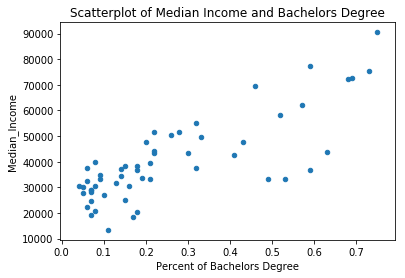

In [9]:
# Show graphs within the Python notebook use matplotlib inline command
%matplotlib inline

df.plot(kind= 'scatter', x = "Bachelors_degree", y= "Median_Income")
plt.xlabel("Percent of Bachelors Degree")
plt.title("Scatterplot of Median Income and Bachelors Degree")

plt.show()

Run a regression model of the following form:
Report a table with all coefficient estimates including p-values.

$$\textrm{Juvenile_Arrest_Rate} = 
\beta_0 + \beta_1\textrm{Population} + \beta_2\textrm{Median_Income} + \beta_3\textrm{Unemployment} + \beta4\textrm{Education} + \beta_5\textrm{Poverty} + \epsilon $$

In [10]:
# Create a fitted model
import sklearn 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

x = df.loc[:,['Population','Median_Income','Unemployed','Bachelors_degree','Families_in_Poverty']]
y = df['Juvenile_Arrest_Rate']

lm.fit(x,y)
print(lm.coef_)

[-3.86819961e-03 -5.36449643e-03 -3.27225354e+02  4.34178657e+02
  5.23873670e+02]


Interpret the coefficient on median income. A \$1 dollar increase in median income will decrease the incarceration rate by how much? What about a \$1,000 increase?

# Your response here


In [11]:
#A $1 dollar increase in median income will decrease the incarceration by 0.00536. 
#A $1000 increase in median income is predicted to lead to a 5.36 percent decrease in juvenile arrest rate.